In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

from sklearn.datasets import make_blobs

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from adspy_shared_utilities import plot_two_class_knn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

ModuleNotFoundError: No module named 'graphviz'

# OvaCheck

<img src="Figures/OvaCheck abstract.png">
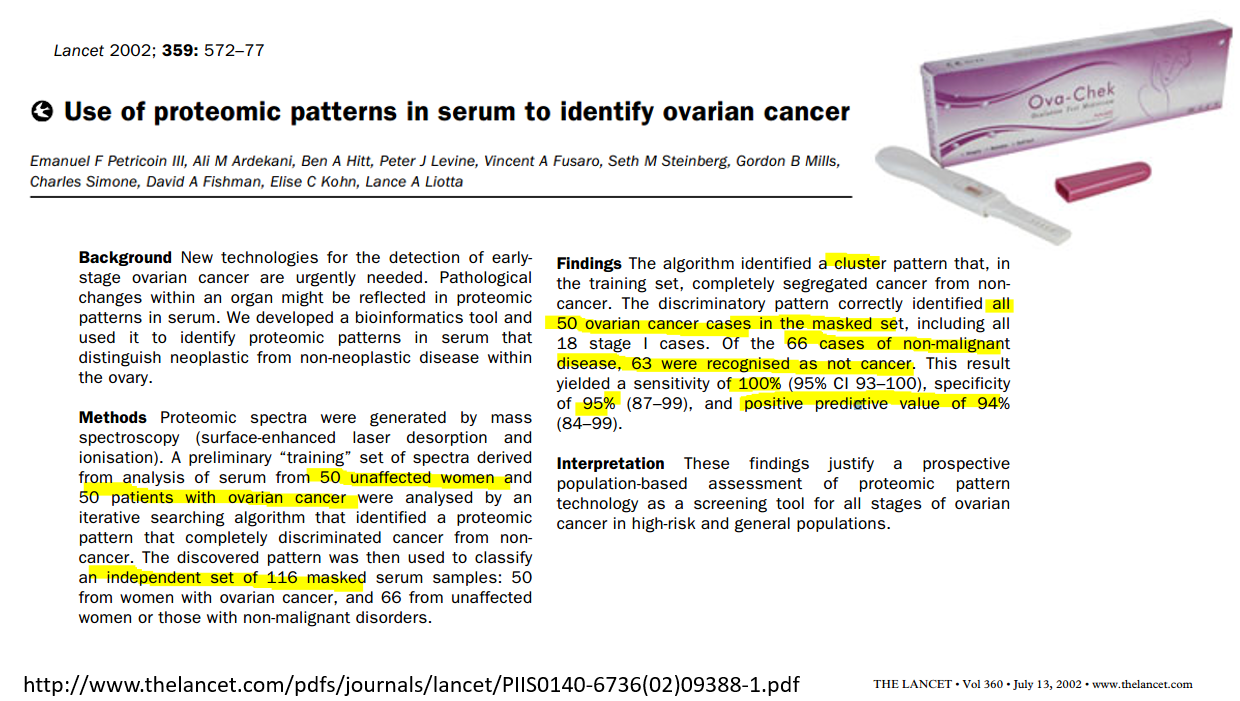

# Without the data, can we replicate the idea?

<img src="https://i.pinimg.com/originals/74/d0/c4/74d0c441d18031ce5b90eba97a25ca49.png">

1. <font size=3>Generate balanced clusters of training data of 100 patients</font>
    1. cancer cohort: 50 patients where proteins A and B are normally distributed over center (0.5, 0.5)
    2. healthy cohort: 50 patient where proteins A and B are normally distributed with center (2, 2)
    
2. <font size=3>Train a clustering algorithm on the training set of 100 patients</font>

3. <font size=3>Generate an independent validation set of 116 patients</font>
    1. cancer cohort: 50 patients sampled from same distribution as training data
    2. healthy cohor: 66 patients sampled from same distribution as training data 
4. <font size=3>Validate trained model on independent set of 116 patients</font>
    1. performance should ideally be close to reported results
        - __sensitivity 100%__
        - __specificity 95%__
        - __PPV 94%__

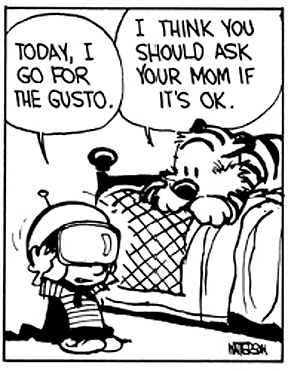

# Generate balanced clusters of training data of 100 patients

<font size = 3>__Q1__:How many samples to generate for each class (cancer, healthy)?

__A1__: n_samples = ___ </font>


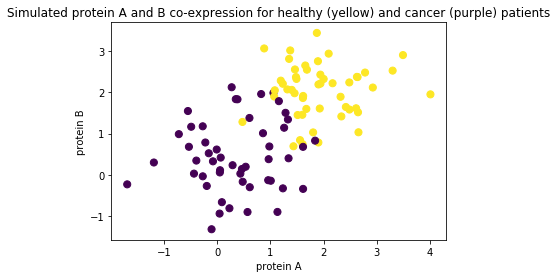

In [356]:
axis_names = ['protein A', 'protein B']
class_names = ['cancer', 'healthy']
cluster_std = 0.75
random_state = 3

X_D2, y_D2 = make_blobs(n_samples = [50,50], n_features = 2, centers = [[0.5,0.5], [2,2]],
                       cluster_std = cluster_std, random_state = random_state)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Simulated protein A and B co-expression for healthy (yellow) and cancer (purple) patients')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50)
plt.xlabel(axis_names[0])
plt.ylabel(axis_names[1])
plt.show()

# Train a clustering algorithm on the training set of 100 patients

<font size=3> __Q1__: How does k-nearest neighbor(kNN) clustering work?
    
__A1__: Decides the class (i.e., yes or no cancer) based on the votes of the ___ -nearest neighbors </font>

## What happens if we vary k?

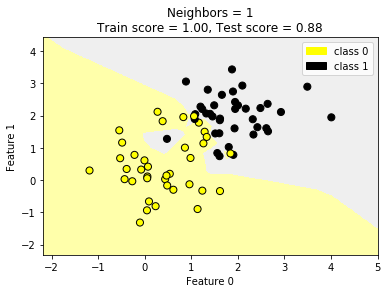

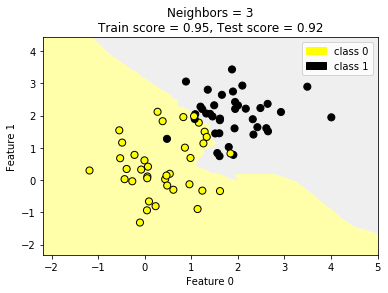

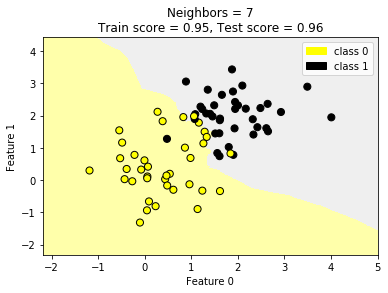

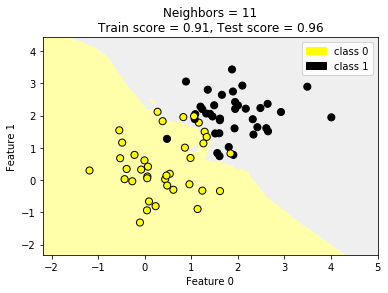

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=random_state)

#compare different k's and can see the effect of model complexity in models' ability to generalize to the test score. 
#Note that k=1 gives perfect training score.

#plots training points & decision boundary
plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 7, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

## Tuning kNN clustering
<font size=3> __Q1__: What k (i.e., nearest neighbors that vote) should we use?
 
 __A1__: </font> n_neighbors = ___

In [358]:
n_neighbors=7

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state=random_state)

knn = KNeighborsClassifier(n_neighbors)

#knn is a example of more general class called estimator in SKL
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.96

## How do evaluate our kNN model?

<font size=3>__Q1__: what are good evaluation measures for a predictive model?

__A1__: ____ </font>

## Training set (75%) performance:

<font size = 3> 
- Sensitivity: 100%
- Specificity: 100%
- PPV: 100%
- NPV: 100%
</font>

In [359]:
print(classification_report(y_train, knn.predict(X_train), target_names = class_names))

              precision    recall  f1-score   support

      cancer       0.97      0.92      0.94        37
     healthy       0.93      0.97      0.95        38

   micro avg       0.95      0.95      0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



## Test set (25%)  set performance:

<font size = 3> 
- Sensitivity: 85%
- Specificity: 83%
- PPV: 85%
- NPV: 83%
</font>

In [360]:
print(classification_report(y_test, knn.predict(X_test),target_names = class_names))

              precision    recall  f1-score   support

      cancer       1.00      0.92      0.96        13
     healthy       0.92      1.00      0.96        12

   micro avg       0.96      0.96      0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



Confusion matrix, without normalization
[[12  1]
 [ 0 12]]
Normalized confusion matrix
[[0.92 0.08]
 [0.   1.  ]]


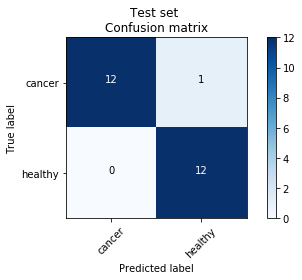

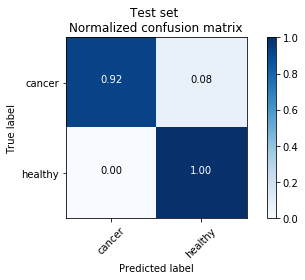

In [361]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, knn.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Test set \nConfusion matrix')

# Generate an independent validation set of 116 patients
<img src="Figures/OvaCheck methods.png" align="left">

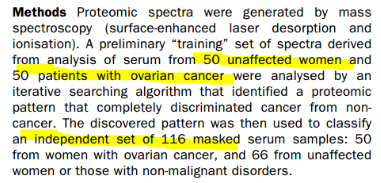

<Figure size 432x288 with 0 Axes>

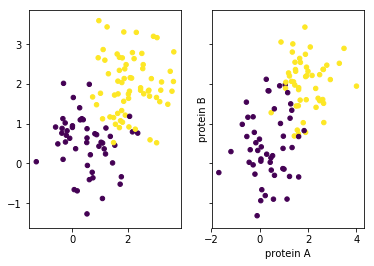

In [363]:
X_indep, y_indep = make_blobs(n_samples = [50,66], n_features = 2, centers = [[0.5,0.5], [2,2]],
                       cluster_std = cluster_std, random_state = random_state+1)

plt.figure()
#plt.subplot(1,2,1)
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
#plt.title('Simulated independent set of protein A & B co-expression \n116 samples (66 healthy in yellow, 50 cancer in purple)')
ax1.scatter(X_indep[:,0], X_indep[:,1], c=y_indep,
           marker= 'o', s=20)
plt.xlabel(axis_names[0])
plt.ylabel(axis_names[1])
#plt.show()

#plt.figure()
#plt.subplot(1,2,2)
#plt.title('Simulated protein A and B co-expression \n100 patients (50 healthy in yellow, 50 cancer in purple)')
ax2.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=20)
plt.xlabel(axis_names[0])
plt.ylabel(axis_names[1])

plt.show()

# Validate trained model on independent set of 116 patients

Confusion matrix, without normalization
[[45  5]
 [ 4 62]]


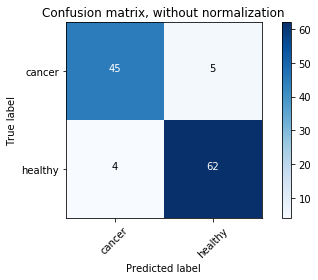

In [364]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_indep, knn.predict(X_indep))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

plt.show()

In [365]:
print(classification_report(y_indep, knn.predict(X_indep),target_names = class_names))

              precision    recall  f1-score   support

      cancer       0.92      0.90      0.91        50
     healthy       0.93      0.94      0.93        66

   micro avg       0.92      0.92      0.92       116
   macro avg       0.92      0.92      0.92       116
weighted avg       0.92      0.92      0.92       116



## Independent validation set performance:

<font size = 3> 
- Sensitivity: 92%
- Specificity: 94%
- PPV: 92%
- NPV: 94%
</font>

<img src="Figures/OvaCheck findings.png" align="left">
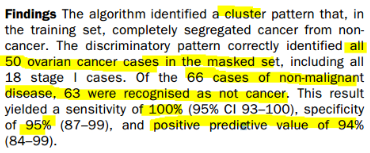

# How well does unbalanced data perform?

<font size=3> Let's say 10 cancer cases, 90 healthy cases</font>

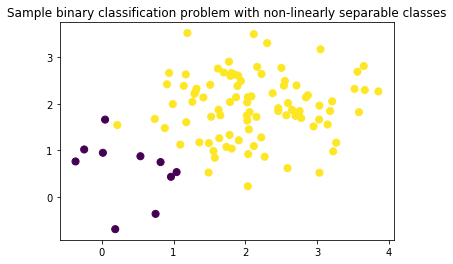

In [366]:
#see how model performs with unbalanced data

X_ub, y_ub = make_blobs(n_samples = [10,90], n_features = 2, centers = [[0.5,0.5], [2,2]],
                       cluster_std = cluster_std, random_state = random_state+1)
y_ub = y_ub % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_ub[:,0], X_ub[:,1], c=y_ub,
           marker= 'o', s=50)
plt.show()

Confusion matrix, without normalization
[[10  0]
 [ 5 85]]


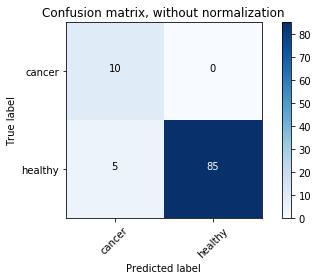

In [367]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_ub, knn.predict(X_ub))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

In [368]:
print(classification_report(y_ub, knn.predict(X_ub), target_names = class_names))

              precision    recall  f1-score   support

      cancer       0.67      1.00      0.80        10
     healthy       1.00      0.94      0.97        90

   micro avg       0.95      0.95      0.95       100
   macro avg       0.83      0.97      0.89       100
weighted avg       0.97      0.95      0.95       100



## Imbalanced 10:90 set performance:

<font size = 3> 
- Sensitivity: 100%
- Specificity: 94%
- PPV: 67%
- NPV: 100%
</font>

# What about a realistic dataset?

__Q1__: What is the incidence of ovarian cancer? 

__A1__: ___ per 100,000 population


[     ]  Plot the decision boundary here

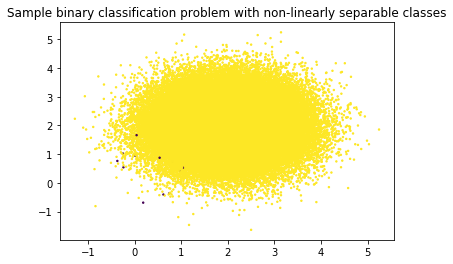

In [375]:
#see how model performs with unbalanced data

X_real, y_real = make_blobs(n_samples = [12,99988], n_features = 2, centers = [[0.5,0.5], [2,2]],
                       cluster_std = cluster_std, random_state = random_state+1)
y_ub = y_ub % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_real[:,0], X_real[:,1], c=y_real,
           marker= 'o', s=2)
plt.show()

Confusion matrix, without normalization
[[   12     0]
 [10094 89894]]


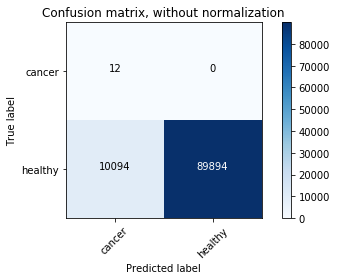

In [370]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_real, knn.predict(X_real))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')

In [371]:
print(classification_report(y_real, knn.predict(X_real), target_names = class_names))

              precision    recall  f1-score   support

      cancer       0.00      1.00      0.00        12
     healthy       1.00      0.90      0.95     99988

   micro avg       0.90      0.90      0.90    100000
   macro avg       0.50      0.95      0.47    100000
weighted avg       1.00      0.90      0.95    100000



## Realistic 12 per 100k dataset performance:

<font size = 3> 
- Sensitivity: 100% 
- Specificity: 91%
- PPV: 0%
- NPV: 100%
</font>

|                 -| actually negative | actually negative |
|------------------|-------------------|-------------------|
| test is positive | 12                | 24,112            |
| test is negative | 0                 | 75,876            |

<font size=5> Do you believe authors' claim?</font>

<img src="Figures/OvaCheck interpretation.png" align="left">
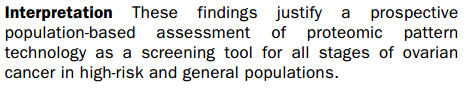

<img src="Figures/PPV.png" align="left">
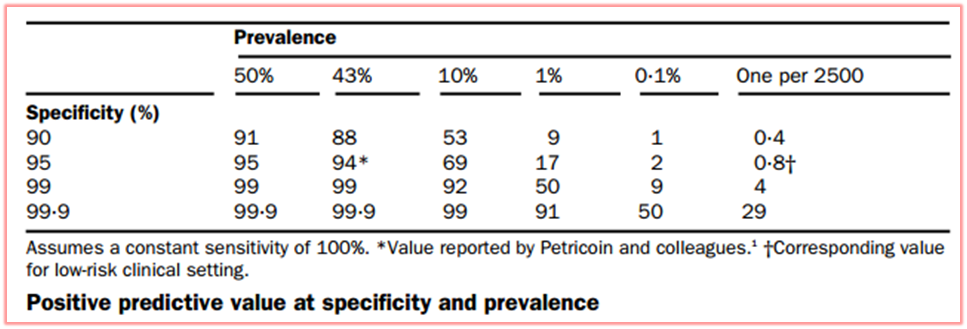

# Final lessons

<font size=3> 

1. PPV depends on the proportion of patients with disease in the population

2. A screening model should be trained on a dataset that accurately reflects real-life prevalence of the population being screened

 </font>